----------

## Dataset Information


Dry beans classification

Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Introductory Paper:

    "Multiclass classification of dry beans using computer vision and machine learning techniques"

    By M. Koklu, Ilker Ali Özkan. 2020
    Published in Computers and Electronics in Agriculture

Link to the paper:
https://www.semanticscholar.org/paper/e84c31138f2f261d15517d6b6bb8922c3fe597a1

Link to the data set:
https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

#### **Features formation info according papaer:**

![Features_list Image](Features_list.png)

**Beans:**

![Beans Image](Beans.jpg)


---------------

## Import Libraries

In [1]:
# import libraries

import numpy as np
import pandas as pd
import math
pd.set_option('display.max_colwidth', None)

from scipy import stats

import random
import pickle
import itertools
from collections import Counter
import warnings

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# import category_encoders as ce
# from category_encoders import CountEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.decomposition import PCA
from sklearn import metrics

# Classsification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# Performance Metrics and Validation techniques
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix,recall_score,precision_score,roc_curve,auc
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# random seed
SEED = 42
# random.seed(SEED)
# np.random.seed(SEED)

# 1. Read the data

In [3]:
# !pip3 install -U ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean_dataset = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean_dataset.data.features
y = dry_bean_dataset.data.targets

# metadata
# print(dry_bean_dataset.metadata)

# variable information
# print(dry_bean_dataset.variables)

### 1.1. Variable information

In [4]:
# variable information

# descriptions = dry_bean_dataset.variables.description
# # Print each description
# for description in descriptions:
#     print(description)

display(dry_bean_dataset.variables[['name','role','type','description','units','missing_values']])

,name,role,type,description,units,missing_values
0,Area,Feature,Integer,The area of a bean zone and the number of pixels within its boundaries,pixels,no
1,Perimeter,Feature,Continuous,Bean circumference is defined as the length of its border.,None,no
2,MajorAxisLength,Feature,Continuous,The distance between the ends of the longest line that can be drawn from a bean,None,no
3,MinorAxisLength,Feature,Continuous,The longest line that can be drawn from the bean while standing perpendicular to the main axis,None,no
4,AspectRatio,Feature,Continuous,Defines the relationship between MajorAxisLength and MinorAxisLength,None,no
5,Eccentricity,Feature,Continuous,Eccentricity of the ellipse having the same moments as the region,None,no
6,ConvexArea,Feature,Integer,Number of pixels in the smallest convex polygon that can contain the area of a bean seed,None,no
7,EquivDiameter,Feature,Continuous,Equivalent diameter: The diameter of a circle having the same area as a bean seed area,None,no
8,Extent,Feature,Continuous,The ratio of the pixels in the bounding box to the bean area,None,no
9,Solidity,Feature,Continuous,Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.,None,no


In [5]:
display("Features",X.head(2))
print()
display("Tagret",y.head(2))
print()
print("Tagret unique values: ",y['Class'].unique())

'Features'

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430


'Tagret'

,Class
0,SEKER
1,SEKER



Tagret unique values:  ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


-----------------

# 2. Perform EDA

EDA (Exploratory Data Analysis) helps clean up a dataset and it gives us a better understanding of the variables and the relationships between them.


In [6]:
# Combine features (X) and targets (y) into a single DataFrame
df_eda = pd.concat([X, y], axis=1)

#### Data dimensionality

In [7]:
# check the data dimensionality
nRow, nCol = df_eda.shape

print(f' => The data set has \033[1m{nRow}\033[0m rows and \033[1m{nCol}\033[0m columns.')
# df_eda.head()

 => The data set has 13611 rows and 17 columns.


#### General info

In [8]:
# General info for the data set: range index, column data types, non-null values.

df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

#### Check for missing values

In [9]:
# null values
df_eda.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### Check for duplicate rows

In [10]:
# Check for duplicate rows
# print(df_eda.duplicated().any())
# df_eda.duplicated().sum()

df_duplicate_rows = df_eda[df_eda.duplicated()]
print(f'Number of duplicates rows: {df_duplicate_rows.shape[0]}')

Number of duplicates rows: 68


Duplicate rows will be droped during preprocesing part.

#### Descriptive statistics

In [11]:
# descriptive statistics of numerical features

df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860154
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRatio,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [12]:
# descriptive statistics of categorical features

df_eda.describe(include=['object']).T

,count,unique,top,freq
Class,13611,7,DERMASON,3546


#### Distribution of target variable

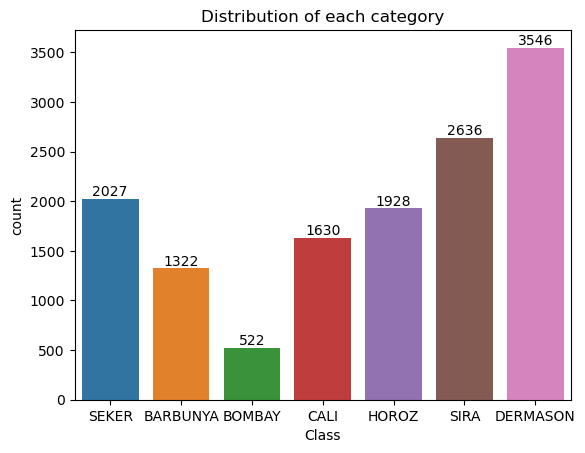

In [13]:
# plt.figure(figsize=(12,8))
cp=sns.countplot(data=df_eda, x='Class')
cp.bar_label(cp.containers[0])
plt.title('Distribution of each category')
plt.show()

The distribution of the target variable is not balanced.

An imbalanced dataset can be fixed with oversampling the minority class, undersampling the majority class, using a combination of both techniques or the algorithmic approache.

The algorithmic approache is using algorithms that are robust to class imbalance, such as decision trees, random forests, gradient boosting machines, and support vector machines.

### Univariate analysis

Univariate analysis are defined as analysis carried out on only one (“uni”) variable (“variate”) to summarize or describe the variable.

We can do this by ploting histograms of each of our variables.

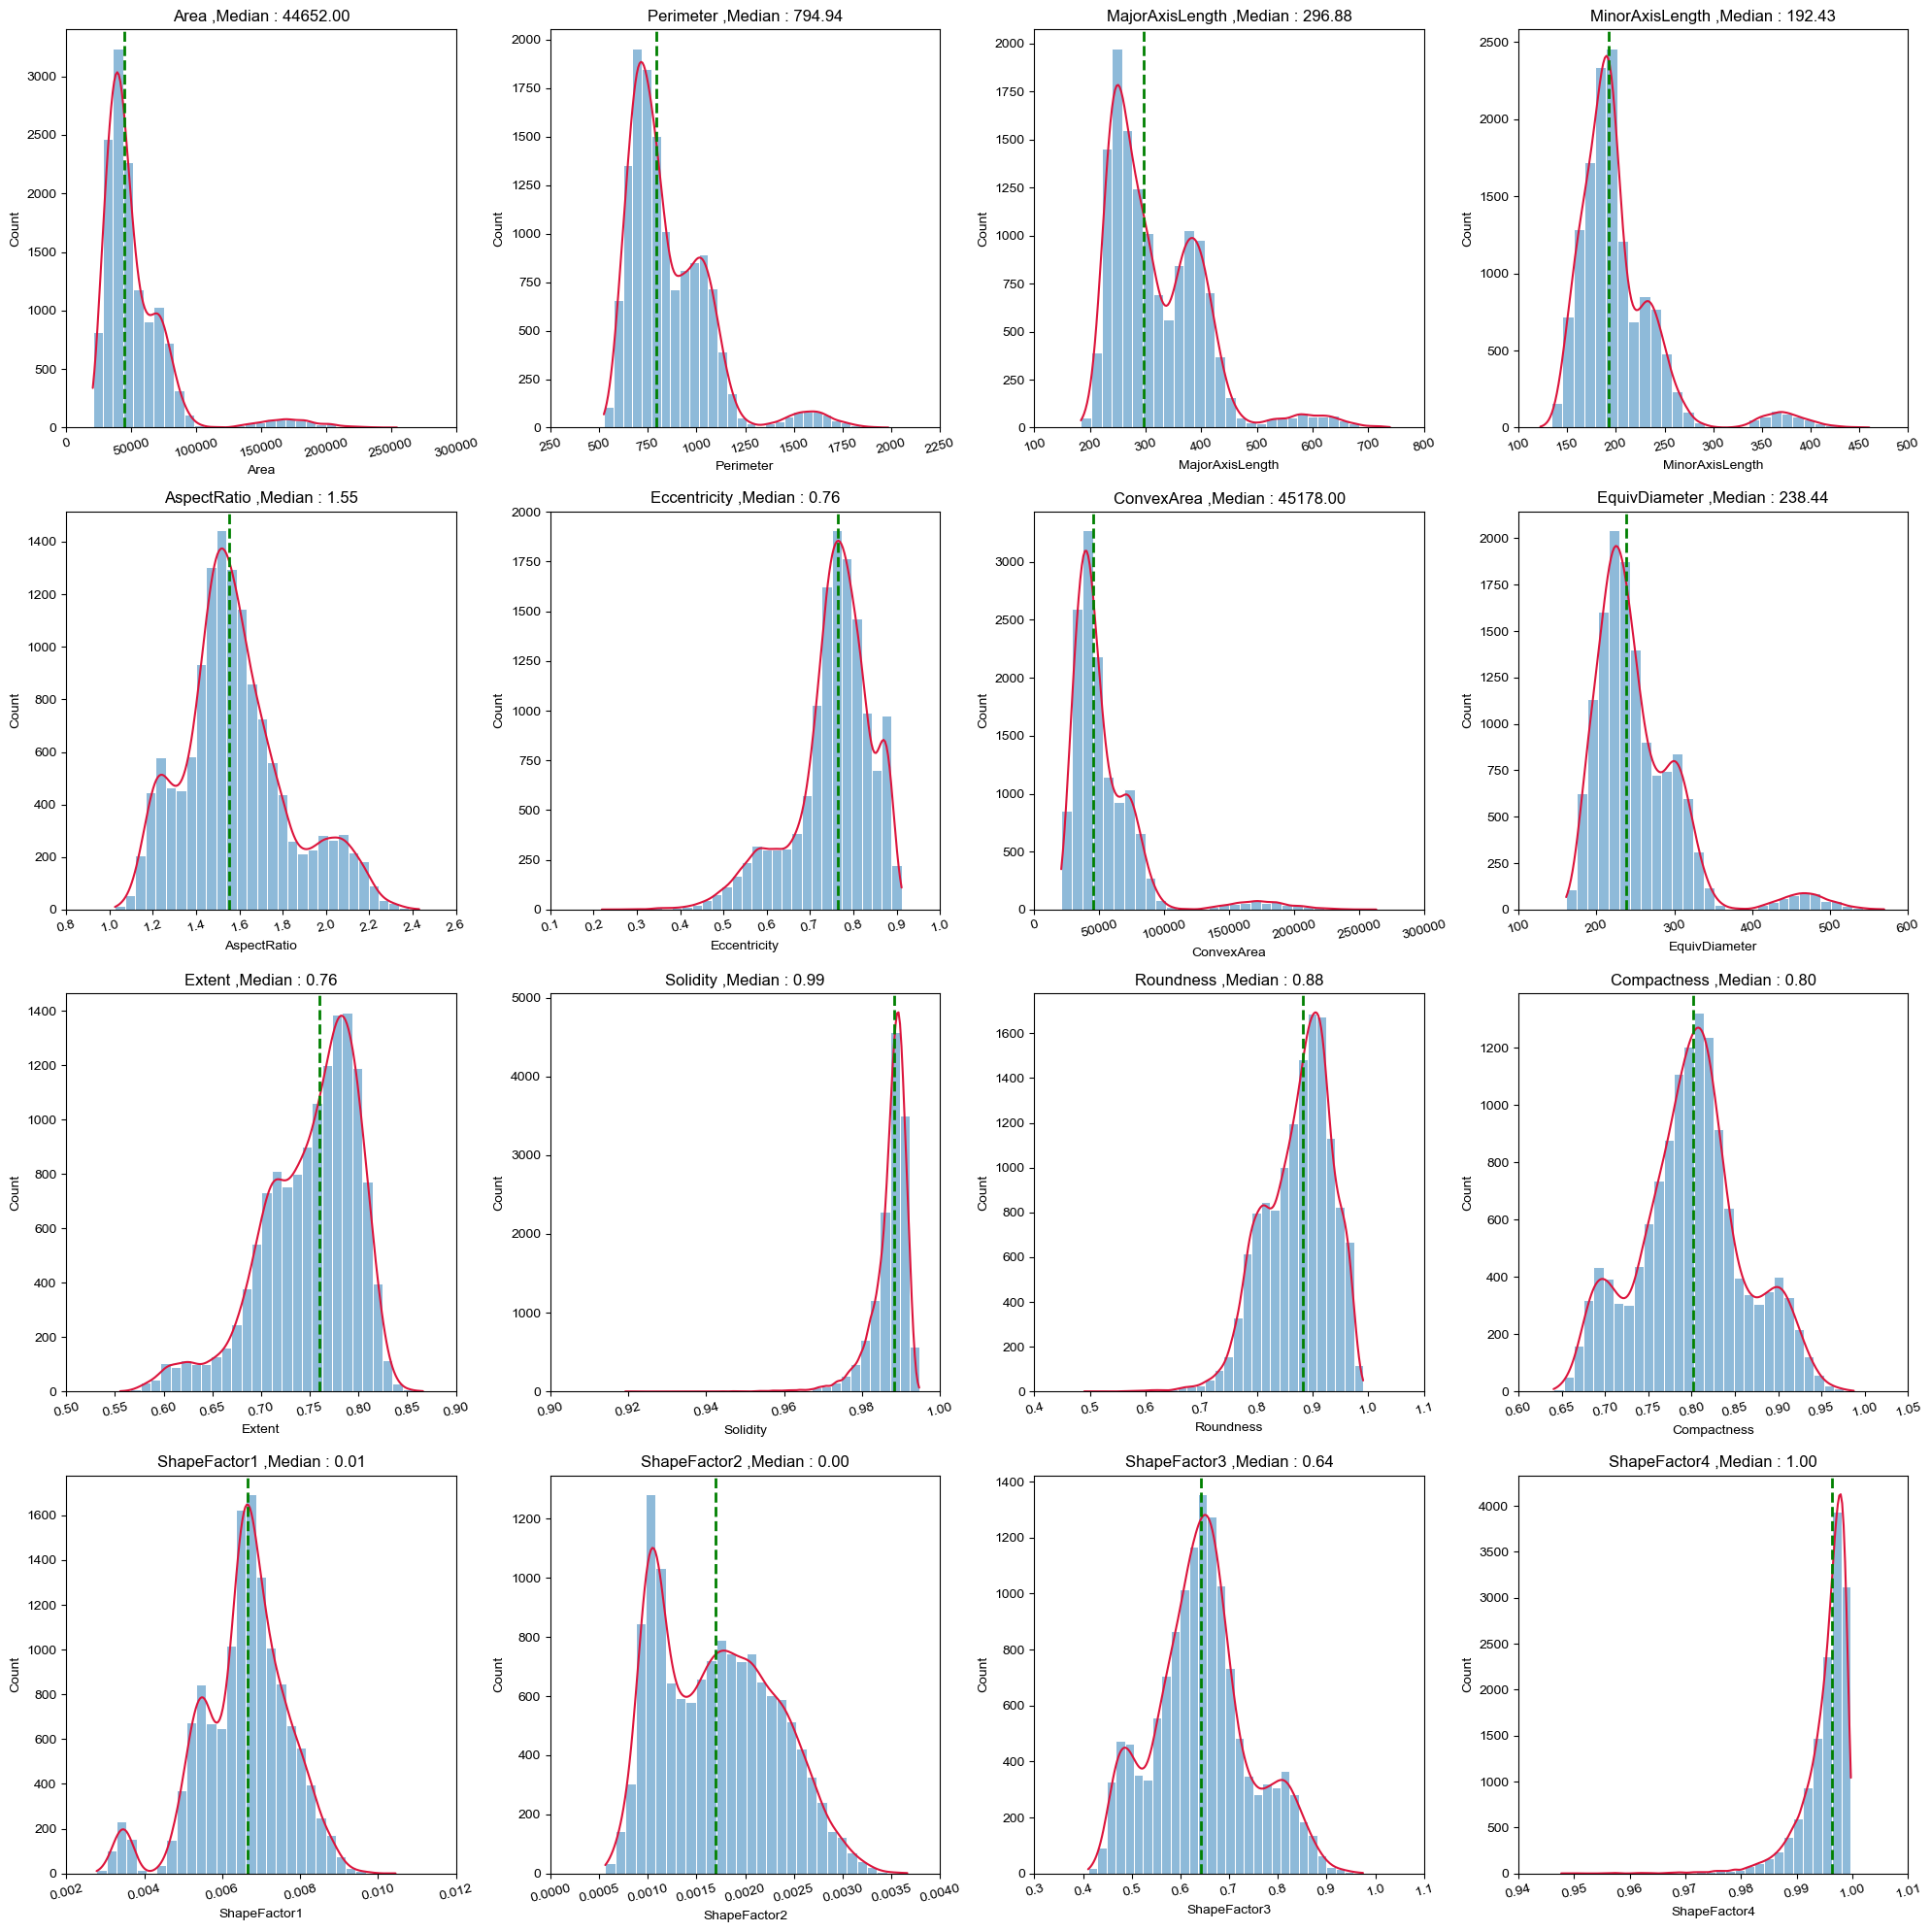

In [14]:
# Set up the subplots
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
sns.set_style("darkgrid")

# Loop through each column and create a histogram
for feature, subplot in zip(X.columns, ax.flatten()):

    g=sns.histplot(X[feature],bins=30,kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    median = X[feature].median()
    g.axvline(x=median, color='g', label='Median', linestyle='--', linewidth=2)
    subplot.set_title( f'{feature} ,Median : {median:0.2f}')
    subplot.set_xticks(subplot.get_xticks())  # Set the tick positions
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=15)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()

Some of the features are very skewed. To address this skewness, different transformations can be applied.

### Bivarite analysis

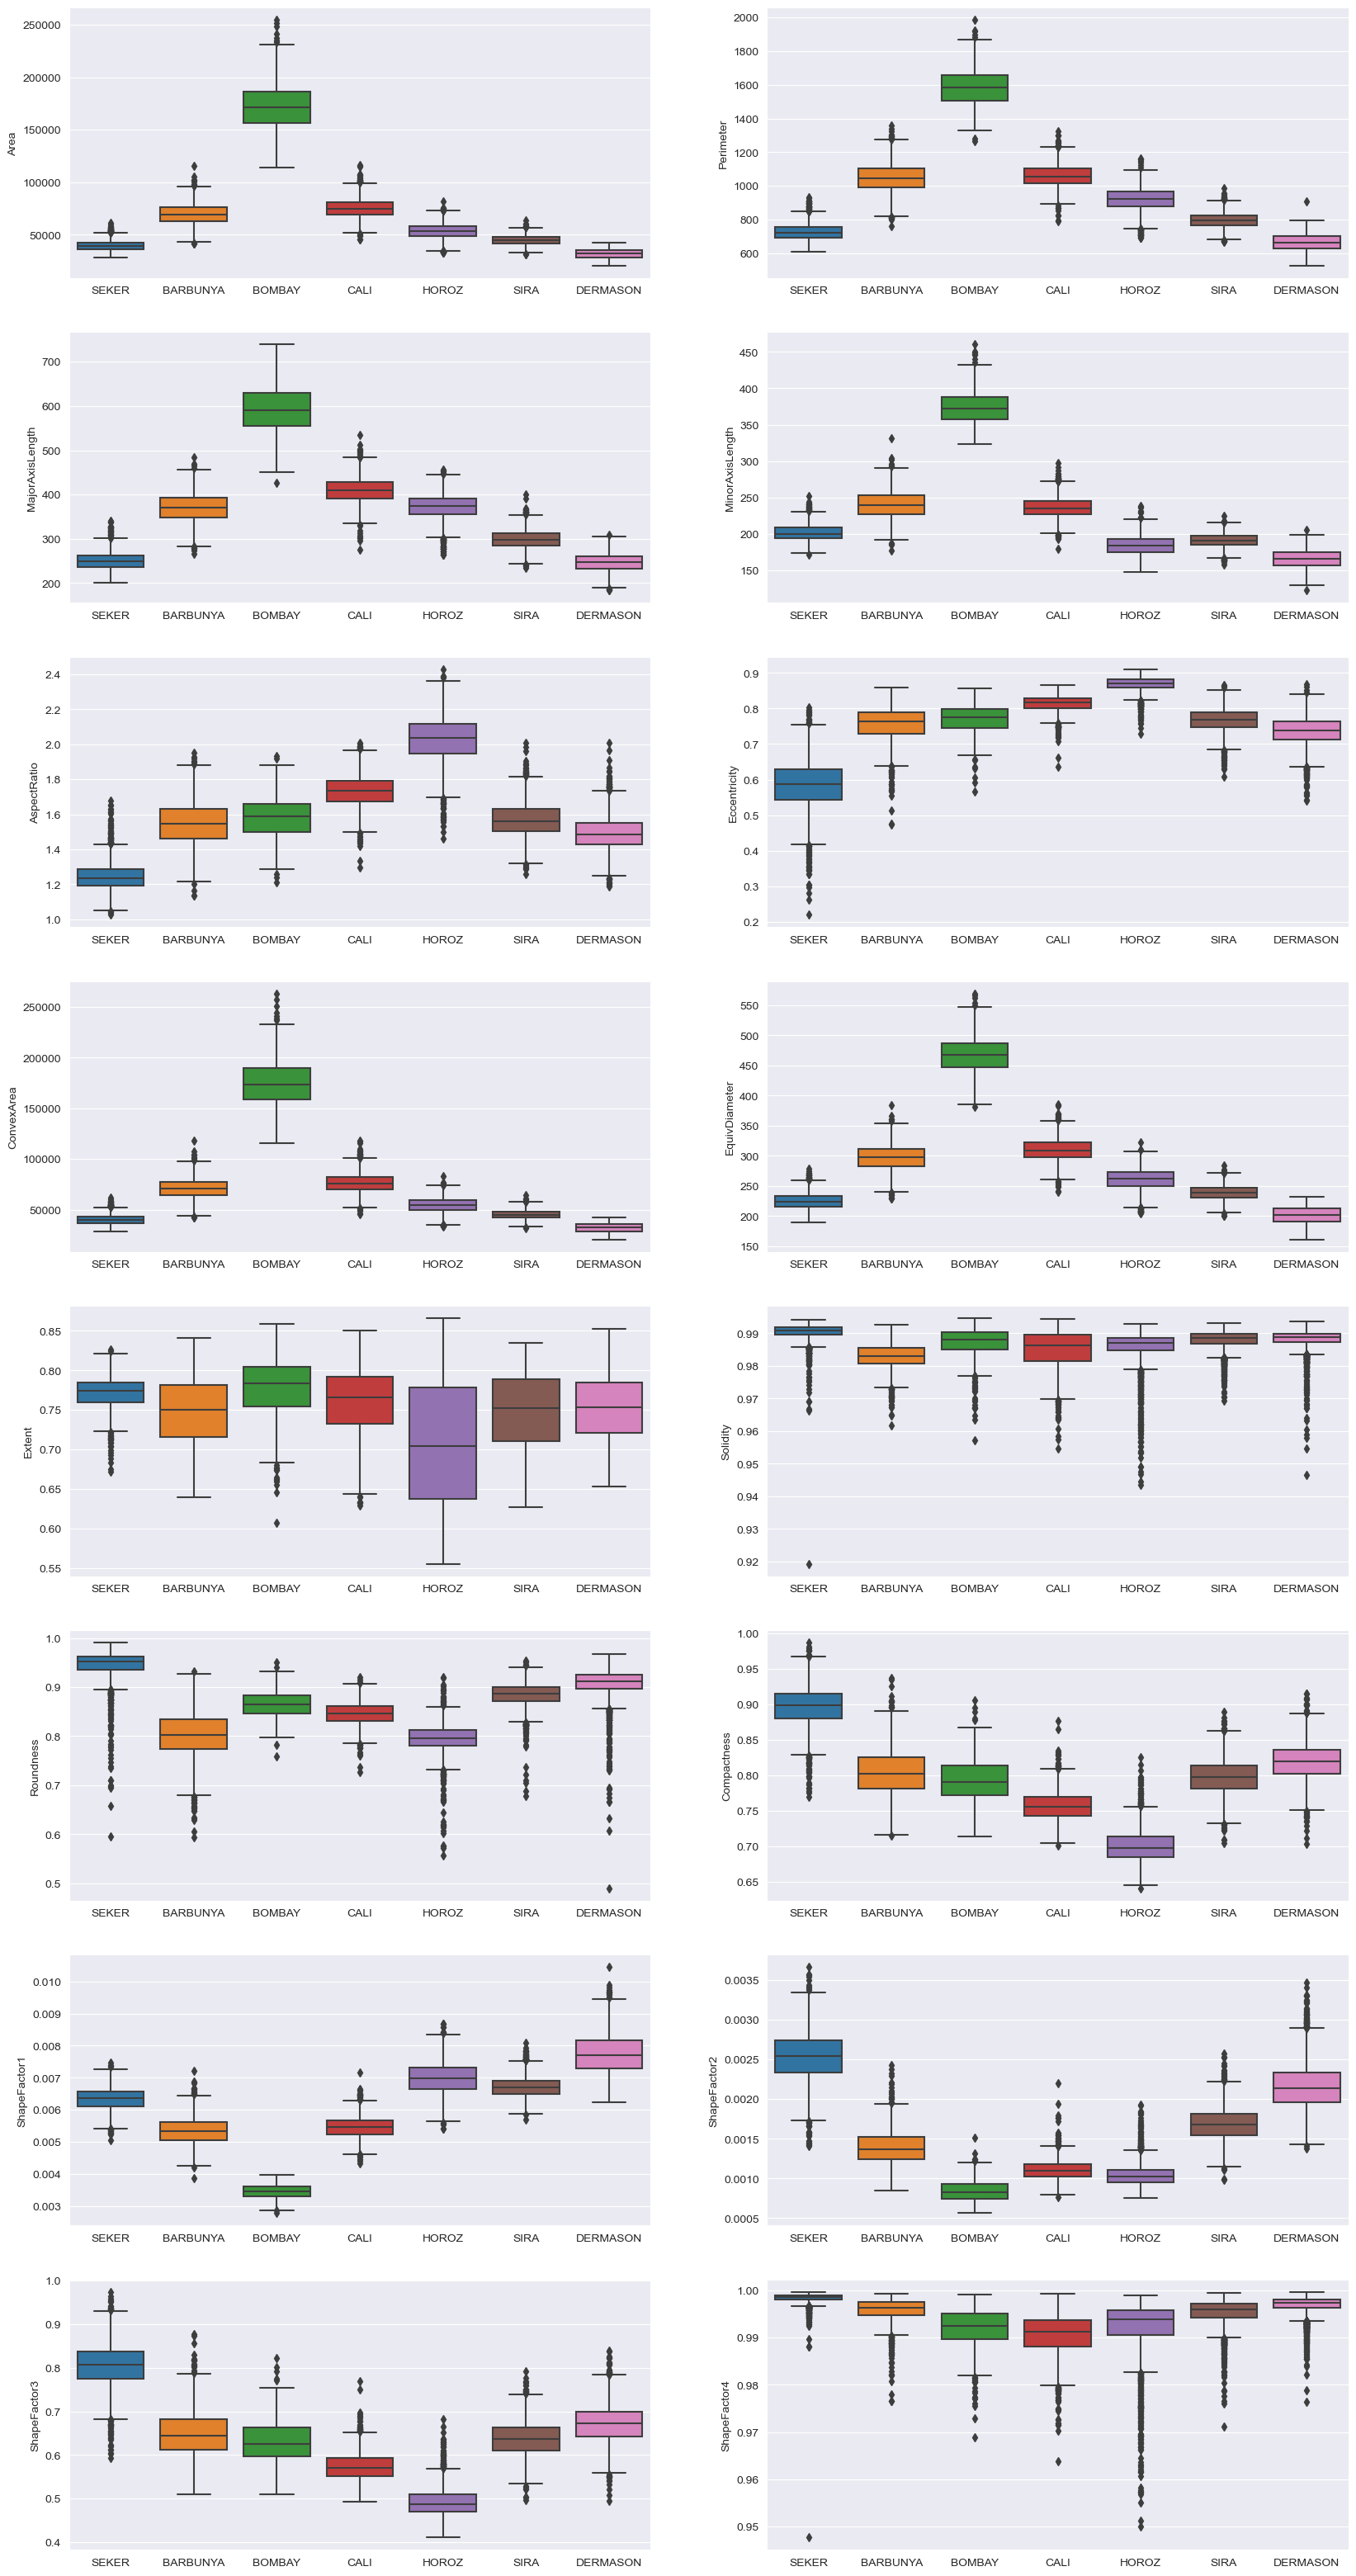

In [15]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(df_eda.columns.drop("Class"), axes.flatten()):
    sns.boxplot(data=df_eda,
                   x="Class",
                   y=feature,
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

-  Most of the features exhibit outliers, with some demonstrating notably higher occurrences than others.
-  Class Bombay differs significantly from other classes in terms of area, perimeter, major and minor axises length and this    difference is similarly reflected in related parameters such as convex area, equivalent diameter and shape factor 1.
- Class Horoz stands out from other classes in terms of aspect ratio, extent (having a larger range of values), and shape factor 3.
- In many features, classes Barbunya and Cali demonstrate similar distributions and values, potentially leading to mislabeling one as the other. The same situation occurs between class Dermason and Seker for some features, and Sira for others.

### Detecting Outliers

In [16]:
# save numeric columns

numeric_columns = df_eda.select_dtypes(include=['number']).columns
numeric_columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [17]:
# Z-Score vo every feature in df_eda

print(f"Number of Outliers detected using Z-Score for feature:\n")

for feature in numeric_columns:
    z_scores = np.abs(stats.zscore(df_eda[feature]))
    outliers_zscore = df_eda[np.where(z_scores > 3, True, False)]

    # number of outliers for the current feature
    num_outliers = len(outliers_zscore)

    print(f"{feature}: {num_outliers}")


Number of Outliers detected using Z-Score for feature:

Area: 483
Perimeter: 404
MajorAxisLength: 316
MinorAxisLength: 508
AspectRatio: 15
Eccentricity: 125
ConvexArea: 483
EquivDiameter: 465
Extent: 135
Solidity: 238
Roundness: 74
Compactness: 1
ShapeFactor1: 59
ShapeFactor2: 5
ShapeFactor3: 8
ShapeFactor4: 242


Skewness is often caused by the presence of outliers or extreme values in the dataset. So transforming the data to address skewness can reduce the influence of outliers and make the data more normally distributed.

### Multivariate analysis ( Correlation matrix / heatmap )

- In multivariate analysis we look at three or more variables. A good way to represent these relationships is heatmaps/correlation matrix.
- The correlation matrix allows us to identify variables with high degrees of correlation, enabling us to reduce the number of features in a dataset.

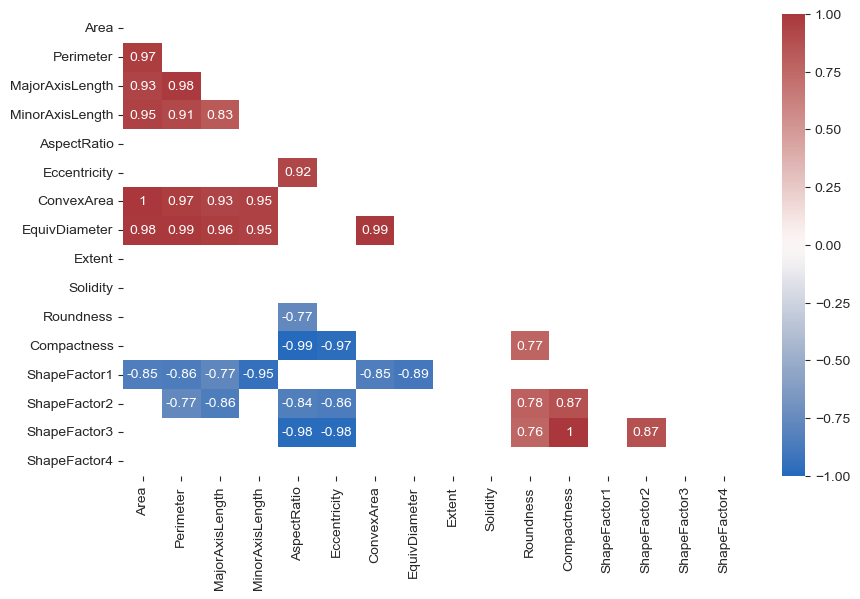

In [18]:
sns.set_style("ticks")

# Showing only the bottom half of our correlation matrix

corr_matrix = df_eda.select_dtypes(include=['number']).corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 6))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# # Configure a custom diverging colormap
# cmap = sns.diverging_palette(135, 10, as_cmap=True)

# Draw the heatmap
# sns.heatmap(corr_matrix, annot=True, mask = mask, vmax=1, vmin=-1, center=0, cmap="vlag")

sns.heatmap(corr_matrix[(corr_matrix>0.75) | (corr_matrix<-0.75)],
            annot=True, mask = mask, vmax=1, vmin=-1, center=0, cmap="vlag")
plt.show()

- The correlation matrix is filtered to identify pairs of features that have a correlation coefficient greater than 0.75 or less than -0.75.

In our case, we observe high correlation between multiple features.
To reduce this correlation we can drop correlated features, or we can use some of the dimensionality reduction technique like PCA, or use SelectKBest for feature selection.

In [20]:
# sns.pairplot(df_eda, hue="Class", corner=True) #diag_kind='hist'

**EDA summary**


During the exploratory data analysis (EDA), it was discovered that the dataset had no missing values but contained duplicates, which will be handled during preprocessing. The target variable's distribution is imbalanced, thus robust algorithms like decision trees, random forests, gradient boosting machines, and support vector machines will be used. Skewed features will be adjusted using power transformation to minimize the impact of outliers, which were notably present in many features. Furthermore, the high correlation among features will be addressed through techniques such as PCA or feature selection methods like Select K Best.

-----------

# 3. Define preprocessing

In [21]:
# preprocessing example:
# 1) fix nan, duplicates ...
# 2) encode categorical
# 3) scale (only cat, only num, or both)
# 4) PCA or select k best features
# 5) fit a model ([RF, kNN...)

### Dropping duplicates

In [22]:
# Class for dropping duplicate rows

class DropDuplicates(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        if X_copy.duplicated().any():
            X_copy.drop_duplicates(inplace=True)
        return X_copy

In [25]:
df_eda = DropDuplicates().transform(df_eda)
df_eda.shape

(13543, 17)

### 3.1. Data for Dependent and Independent Variables sets

In [26]:
X = df_eda.drop(columns = ['Class'])
y = df_eda['Class']

In [27]:
display(X.head(2), y.head(2))

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430


0    SEKER
1    SEKER
Name: Class, dtype: object

### 3.2. Splitting Data sets

In [28]:
# Splitting Data into Train, Validation, and Test Sets

# Splitting into Train/Validation and test Sets
X_tr_val, X_test, y_tr_val, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state = SEED)

# Splitting Train/Validation Set into Train and Validations Sets
X_train, X_val, y_train, y_val = train_test_split(X_tr_val, y_tr_val, test_size=0.25, stratify=y_tr_val, shuffle=True, random_state = SEED)

In [29]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((8125, 16), (2709, 16), (2709, 16), (8125,), (2709,), (2709,))

In [29]:
# y_train.values == y_train.to_numpy()
# Y_train.values.flatten() == Y_train.to_numpy().reshape(-1,1)
# y_train = np.reshape(y_train, (-1,))

In [30]:
# y_train=y_train.values.flatten()
# y_val = y_val.values.flatten()
# y_test = y_test.values.flatten()
# y_train.shape, y_val.shape, y_test.shape

In [30]:
# checking destribution

display("Training set:",pd.Series(y_train).value_counts())
display("Validation set:",pd.Series(y_val).value_counts())
display("Test set:",pd.Series(y_test).value_counts())

'Training set:'

Class
DERMASON    2127
SIRA        1582
SEKER       1216
HOROZ       1116
CALI         978
BARBUNYA     793
BOMBAY       313
Name: count, dtype: int64

'Validation set:'

Class
DERMASON    710
SIRA        527
SEKER       405
HOROZ       372
CALI        326
BARBUNYA    264
BOMBAY      105
Name: count, dtype: int64

'Test set:'

Class
DERMASON    709
SIRA        527
SEKER       406
HOROZ       372
CALI        326
BARBUNYA    265
BOMBAY      104
Name: count, dtype: int64

### 3.3. Encode the categorical target variable

In [31]:
# Encode the categorical target variable in training and testing set

label_encoder = LabelEncoder()

y_train= label_encoder.fit_transform(y_train)
y_val= label_encoder.fit_transform(y_val)
y_test = label_encoder.transform(y_test)

In [32]:
print("Mapping of categorical names to labels:")
for label, name in enumerate(label_encoder.classes_):
    print(f"Label {label}: {name}")

Mapping of categorical names to labels:
Label 0: BARBUNYA
Label 1: BOMBAY
Label 2: CALI
Label 3: DERMASON
Label 4: HOROZ
Label 5: SEKER
Label 6: SIRA


In [35]:
# print(np.unique(y_train))
# print(np.unique(y_val))
# print(np.unique(y_test))

### 3.4. Transformers for Pipeline




#### Handling skewness

In [33]:
power_transformer = PowerTransformer(method='box-cox')  # or method='yeo-johnson'


# Define models

In [34]:
# grid search classifiers

classifiers = {

     'Random Forest': RandomForestClassifier(),
     'Gradient Boosting': GradientBoostingClassifier(),

            }


# Define hyperparameters

In [60]:
# grid search parameter for Classifiers
param_grids_cf = {

     'Random Forest': {'clf__n_estimators': [10, 50, 100],'clf__random_state':[SEED]},
     'Gradient Boosting': {'clf__n_estimators': [10, 50, 100], 
                           'clf__learning_rate': [0.05, 0.1, 0.2], 
                          'clf__random_state':[SEED]},
     'AdaBoost': {'clf__n_estimators': [10, 50, 100], 
                  'clf__learning_rate': [0.05, 0.1, 0.2],
                  'clf__algorithm': ['SAMME'],
                  'clf__random_state':[SEED]},
     'SVM': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf'], 'clf__random_state':[SEED]},
    }

# grid search parameter for SelectKBest
param_grid_select_k = {'select_k__k': [5, 10,16]}


# GridSearch

In [37]:
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

results=[]

f1_scorer = make_scorer(f1_score, average = 'micro')

# Loop through each classifier
for clf_name, clf in classifiers.items():
    #  pipeline
    pipeline = Pipeline([

        ('numeric_imputer', SimpleImputer(strategy='mean')),  # Imputer for missing values
        ('power_transformer', power_transformer),  # Power transformer for handling skewness
        ('scaler', StandardScaler()),  # Scaler for standardization
        ('select_k', SelectKBest(f_classif)),  # feature selection
        ('clf', clf)  # Classifier
    ])

    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=pipeline, param_grid={**param_grids_cf[clf_name], **param_grid_select_k},
                                   cv=skf, scoring=f1_scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_val)
    
    # Store best
    best_score = f1_score(y_val,y_pred,average = 'micro')
    best_pipe = grid_search.best_estimator_
    best_params = grid_search.best_params_

    results.append({'Classifier': clf_name, 'Best_Params': best_params, 
                    'Best_Score': best_score, 'Best_pipe':best_pipe
                      })

c:\Users\micko\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [39]:
# store result 
df_results = pd.DataFrame(results).sort_values('Best_Score', ascending=False)
pd.set_option('display.max_colwidth', 100)
df_results

,Classifier,Best_Params,Best_Score,Best_pipe
3,SVM,"{'clf__C': 10, 'clf__kernel': 'rbf', 'clf__random_state': 42, 'select_k__k': 16}",0.946106,"(SimpleImputer(), PowerTransformer(method='box-cox'), StandardScaler(), SelectKBest(k=16), SVC(C..."
0,Random Forest,"{'clf__n_estimators': 50, 'clf__random_state': 42, 'select_k__k': 16}",0.933924,"(SimpleImputer(), PowerTransformer(method='box-cox'), StandardScaler(), SelectKBest(k=16), (Deci..."
1,Gradient Boosting,"{'clf__learning_rate': 0.05, 'clf__n_estimators': 100, 'clf__random_state': 42, 'select_k__k': 16}",0.933186,"(SimpleImputer(), PowerTransformer(method='box-cox'), StandardScaler(), SelectKBest(k=16), ([Dec..."
2,AdaBoost,"{'clf__learning_rate': 0.05, 'clf__n_estimators': 10, 'clf__random_state': 42, 'select_k__k': 16}",0.669620,"(SimpleImputer(), PowerTransformer(method='box-cox'), StandardScaler(), SelectKBest(k=16), (Deci..."


####  Grid Search CV Final Model

In [40]:
final_pipeline = df_results.iloc[0].Best_pipe
final_pipeline

Pipeline(steps=[('numeric_imputer', SimpleImputer()),
                ('power_transformer', PowerTransformer(method='box-cox')),
                ('scaler', StandardScaler()), ('select_k', SelectKBest(k=16)),
                ('clf', SVC(C=10, random_state=42))])

#### Fitting the final model to test data

In [49]:
y_pred_fin = final_pipeline.predict(X_test)
y_pred_fin 

array([5, 3, 3, ..., 5, 5, 6])

In [50]:
f1_score(y_test,y_pred_fin, average = 'micro')

0.9217423403469915

In [51]:
f1_score(y_test,y_pred_fin, average = 'macro')

0.9331481109165587

In [52]:
print(classification_report(y_test, y_pred_fin))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       265
           1       1.00      1.00      1.00       104
           2       0.92      0.94      0.93       326
           3       0.91      0.93      0.92       709
           4       0.97      0.93      0.95       372
           5       0.94      0.95      0.95       406
           6       0.88      0.86      0.87       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



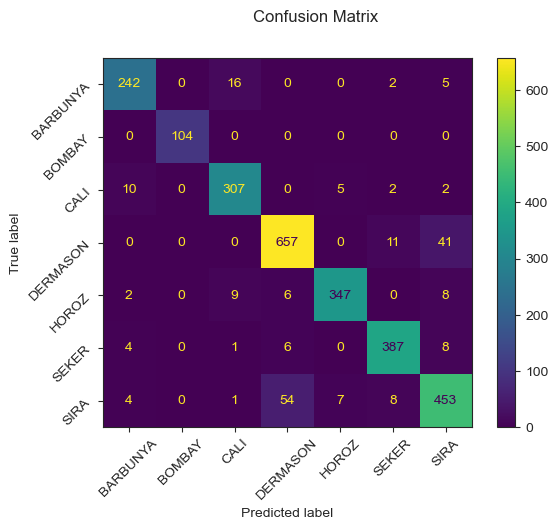

In [53]:
labels = np.unique(y)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_fin, display_labels=labels)
disp.figure_.suptitle("Confusion Matrix")
plt.xticks(rotation=45)  
plt.yticks(rotation=45)  
plt.show()
#plt.savefig("Confusion_Matrix.png")


While the Bombay class was the least represented, there was no mislabeling, resulting in a score of 1. This can be attributed to the distinct characteristics of the Bombay class compared to the others, as observed in the box plot. 
Additionally, the similar distributions and values between Dermason and Sira, as evident in the box plots, raise concerns about potential mislabeling. This assumption is further confirmed by the Confusion Matrix.

-----------------------------------

----------------------

# Use BayesianOPT

In [54]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score


In [61]:
# Define the search space for hyperparameters
# RF Parameters

rf_param_pipe_grid_bo = {"model__max_depth": hp.choice ("model__max_depth", range(10, 50, 10)),
                        "model__n_estimators": hp.choice ("model__n_estimators", [10, 20, 50]),
                         "model__random_state":  hp.choice ("model__random_state", [SEED])
                      }
# Gradient Boosting
GradB_param_pipe_grid_bo = {"model__n_estimators": hp.choice("model__n_estimators", [10, 20, 50]),
                      "model__learning_rate": hp.choice("model__learning_rate", [0.05, 0.1, 0.2]),
                      "model__random_state":hp.choice("model__random_state",[SEED])}

# AdaBoost
AdaB_param_pipe_grid_bo = {"model__estimator":hp.choice("model__estimator",
                                                          # [RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 42)]), - cant be used
                                                          [
                                                                DecisionTreeClassifier(max_depth=10, random_state=SEED)
                                                            ]),
                           'model__algorithm': hp.choice('model__algorithm',['SAMME']),
                        "model__n_estimators": hp.choice("model__n_estimators", [5, 10, 15, 20]),
                      "model__learning_rate": hp.choice("model__learning_rate", [0.4, 0.6, 0.8, 1.0]),
                      "model__random_state":hp.choice( "model__random_state",[SEED])}

# SVM
SVC_param_pipe_grid_bo = {'model__C': hp.choice('model__C', [0.1, 1,5, 7, 10,15,20]),
                       'model__kernel': hp.choice('model__kernel', ['linear', 'rbf']),
                       'model__random_state':hp.choice('model__random_state', [SEED])}

# Feature selection parameters:

# # SelectKBest - could not include with BayesianOPT
# select_k_param_pipe_grid_bo = {'select_kbest': [5, 10,16]}

# Select_PCA: - could not include with BayesianOPT
# PCA_param_pipe_grid_bo = {'Select_PCA__n_components': hp.choice('Select_PCA__n_components', [5, 10,16])}

In [62]:
# List of search space and clf

list_grid_params_bo= [rf_param_pipe_grid_bo, GradB_param_pipe_grid_bo, AdaB_param_pipe_grid_bo,SVC_param_pipe_grid_bo]

models_bo = [RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), SVC()]

model_names_bo = ['rf','GradBoost','AdaBoost', 'SVC']

In [63]:
# Define the objective function

def objective(space):
  current_pipe.set_params(**space)
  score = cross_val_score(current_pipe, X_train, y_train, cv = skf, scoring=make_scorer(f1_score, average='micro')).mean()
  return {'loss':-score, 'status': STATUS_OK}

In [64]:
import warnings

# Filter out the specific warning
warnings.filterwarnings("ignore", message="overflow encountered in multiply")

In [65]:
# Define StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Define report list
report_search_bo = []

for model_params, model, model_name in zip(list_grid_params_bo, models_bo, model_names_bo):
#   print('Currently fitting: ', model_name)
#   print('Chosen parameters: ', model_prams)
 
  # Create a feature selection object for SelectKBest
  # select_kbest = SelectKBest()
 
  # Create a feature selection object for PCA
  # pca = PCA()
    
  current_pipe = Pipeline([
          ('numeric_imputer', SimpleImputer(strategy='mean')),
          ('power_transformer', PowerTransformer()),
          ('scaler', StandardScaler()),
          # ('pca', pca),
          ('model', model)
      ])
  
  # Combine model parameters with feature selection parameters for SelectKBest
  # select_k_param_grid_combined = {**model_params, **select_k_param_pipe_grid_bo}
  
  # Combine model parameters with feature selection parameters for PCA
  # pca_param_grid_combined = {**model_params, **PCA_param_pipe_grid_bo}
  
  # Initialize Trials to keep track of the optimization process
  trials = Trials()
  
  # Run the hyperparameter optimization
  best_params = fmin(fn = objective, space = model_params, algo=tpe.suggest, max_evals = 10, trials=trials)
 
  # Retrieve the best hyperparameters found
  best_score = 0
  for trial in trials.trials:
    best_score = max(best_score, -trial['result']['loss'])
     
  print('Search finished, best parameters: ')
  print(best_params)
  report_search_bo.append([model_name, best_params, best_score])
  

100%|██████████| 10/10 [00:37<00:00,  3.72s/trial, best loss: -0.919876923076923]
Search finished, best parameters: 
{'model__max_depth': 1, 'model__n_estimators': 2, 'model__random_state': 0}
100%|██████████| 10/10 [07:05<00:00, 42.54s/trial, best loss: -0.9216000000000001]
Search finished, best parameters: 
{'model__learning_rate': 1, 'model__n_estimators': 2, 'model__random_state': 0}
100%|██████████| 10/10 [01:05<00:00,  6.59s/trial, best loss: -0.9216]           
Search finished, best parameters: 
{'model__algorithm': 0, 'model__estimator': 0, 'model__learning_rate': 1, 'model__n_estimators': 2, 'model__random_state': 0}
100%|██████████| 10/10 [00:19<00:00,  1.97s/trial, best loss: -0.9284923076923077]
Search finished, best parameters: 
{'model__C': 2, 'model__kernel': 1, 'model__random_state': 0}


In [66]:
# Store best parameters per clf (note: The parameter values for hp.choice are stored as indices)
df_results_bo = pd.DataFrame(report_search_bo, columns = ['name','params', 'score']).sort_values('score', ascending=False)
df_results_bo


,name,params,score
3,SVC,"{'model__C': 2, 'model__kernel': 1, 'model__random_state': 0}",0.928492
1,GradBoost,"{'model__learning_rate': 1, 'model__n_estimators': 2, 'model__random_state': 0}",0.921600
2,AdaBoost,"{'model__algorithm': 0, 'model__estimator': 0, 'model__learning_rate': 1, 'model__n_estimators':...",0.921600
0,rf,"{'model__max_depth': 1, 'model__n_estimators': 2, 'model__random_state': 0}",0.919877


In [67]:
# indices for parameters with best score overall
best_param_bo=df_results_bo.iloc[0].params
best_param_bo

{'model__C': 2, 'model__kernel': 1, 'model__random_state': 0}

**The parameter values for hp.choice are stored as indices. Need to use space_eval to convert the output from fmin to parameters taht the function will understand.**

In [68]:
from hyperopt import space_eval

best_parametars_bo = space_eval(SVC_param_pipe_grid_bo, best_params)
best_parametars_bo

{'model__C': 5, 'model__kernel': 'rbf', 'model__random_state': 42}

In [69]:
best_pipeline_bo = current_pipe.set_params(**best_parametars_bo)
best_pipeline_bo

Pipeline(steps=[('numeric_imputer', SimpleImputer()),
                ('power_transformer', PowerTransformer()),
                ('scaler', StandardScaler()),
                ('model', SVC(C=5, random_state=42))])

#### BayesianOPT Final model predict

In [88]:
best_pipeline_bo.fit(X_train, y_train)
# best_pipeline_bo.fit(X_val, y_val)


Pipeline(steps=[('numeric_imputer', SimpleImputer()),
                ('power_transformer', PowerTransformer()),
                ('scaler', StandardScaler()),
                ('model', SVC(C=5, random_state=42))])

In [89]:
y_pred_fin_bo= best_pipeline_bo.predict(X_test)
y_pred_fin_bo

array([5, 3, 3, ..., 5, 5, 6])

#### results for BayesianOPT

In [90]:
f1_score(y_test,y_pred_fin_bo, average = 'micro')

0.9228497600590624

In [91]:
f1_score(y_test,y_pred_fin_bo, average = 'macro')

0.9339692926761562

In [92]:
f1_score(y_test,y_pred_fin_bo, average = 'weighted')

0.9227716042917973

In [93]:
print(classification_report(y_test, y_pred_fin_bo))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       265
           1       1.00      1.00      1.00       104
           2       0.92      0.94      0.93       326
           3       0.91      0.93      0.92       709
           4       0.96      0.94      0.95       372
           5       0.95      0.96      0.95       406
           6       0.88      0.86      0.87       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



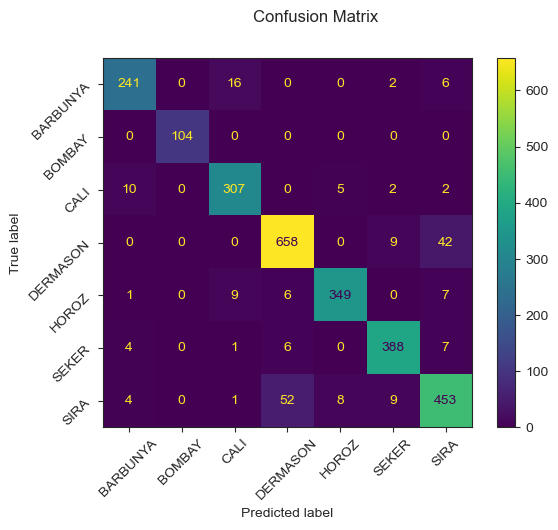

In [94]:
labels = np.unique(y)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_fin_bo, display_labels=labels)
disp.figure_.suptitle("Confusion Matrix")
plt.xticks(rotation=45)  
plt.yticks(rotation=45)  
plt.show()
#plt.savefig("Confusion_Matrix.png")

#### Note

We got almost the same scores with BayesianOPT as we did with Gread search. 

----------------

-----------------------------------

# GeneticCV

### use GeneticCV search https://sklearn-genetic-opt.readthedocs.io/en/stable/api/gasearchcv.html

In [95]:
# pip install sklearn-genetic-opt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Categorical, Continuous
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn_genetic.callbacks import LogbookSaver, ProgressBar

In [96]:
# define the parameters grid

# grid search classifiers

classifiers_ga = {

     'Random Forest': RandomForestClassifier(),
     'Gradient Boosting': GradientBoostingClassifier(),
     'AdaBoost': AdaBoostClassifier(),
     'SVM': SVC()
            }

# grid search parameter for Classifiers
param_ga_cf = {

     'Random Forest': {
                        'clf__n_estimators': Integer(10, 100),
                    #    'clf__random_state':Integer(42)
                       },
     'Gradient Boosting': {
            'clf__n_estimators': Integer(10, 100), 
            'clf__learning_rate': Continuous(0.05, 0.2),
            # 'clf__random_state':Integer(42)
            },
     'AdaBoost': {
         'clf__n_estimators': Integer(10, 100), 
         'clf__learning_rate': Continuous(0.05, 0.2), 
        'clf__algorithm': Categorical (['SAMME']),
         #  'clf__random_state':Integer(42)
         },
     'SVM': {
         'clf__C': Integer(5, 15 ), 
         'clf__kernel': Categorical( ['linear', 'rbf']), 
        #  'clf__random_state':Integer(42)
        },
    }

# grid search parameter for SelectKBest
param_ga_select_k = {'select_k__k': Integer(1, 16)}


# Define StratifiedKFold
skf_ga = StratifiedKFold(n_splits=5, shuffle=True) #, random_state=42)


In [97]:

results_ga=[]

f1_scorer = make_scorer(f1_score, average = 'micro')

# Loop through each classifier
for clf_name, clf in classifiers_ga.items():
    #  pipeline
    pipeline = Pipeline([

        ('numeric_imputer', SimpleImputer(strategy='mean')),  # Imputer for missing values
        ('power_transformer', power_transformer),  # Power transformer for handling skewness
        ('scaler', StandardScaler()),  # Scaler for standardization
        ('select_k', SelectKBest(f_classif)),  # feature selection
        ('clf', clf)  # Classifier
    ])
    
    # Define the GASearchCV options
    evolved_estimator = GASearchCV(estimator=pipeline,
                                cv=skf_ga,
                                scoring=f1_scorer,
                                population_size=10,
                                generations=10,
                                tournament_size=3, # only used if elitism=True
                                elitism=True,  # if False, uses a roulette selection mechanism
                                crossover_probability=0.8,
                                mutation_probability=0.1,
                                param_grid={**param_ga_cf[clf_name], **param_ga_select_k},
                                criteria='max',
                                algorithm='eaMuPlusLambda', # eaSimple, eaMuCommaLambda.
                                n_jobs=-1,
                                verbose=True,
                                keep_top_k=4)
    
    # Fit the model - Train and optimize the estimator
    evolved_estimator.fit(X_train,y_train)
    
    # Predict with the model fitted with the best parameters
    y_pred_ga = evolved_estimator.predict(X_val)
    
    # Store best parameters
    best_score_ga = f1_score(y_val,y_pred_ga,average = 'micro')
    best_params_ga= evolved_estimator.best_params_
    best_pipe_ga = evolved_estimator.best_estimator_ 
       

    results_ga.append({'Classifier': clf_name, 'Best_Params': best_params_ga, 
                    'Best_Score': best_score_ga, 'Best_pipe':best_pipe_ga
                      })

df_results_ga = pd.DataFrame(results_ga).sort_values('Best_Score', ascending=False)


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.862634	0.122491   	0.911138   	0.495385   
1  	18    	0.907225	0.00636435 	0.916554   	0.9008     
2  	19    	0.91392 	0.00616005 	0.920862   	0.902892   
3  	19    	0.918523	0.00238274 	0.920862   	0.915077   
4  	16    	0.919902	0.00131387 	0.920862   	0.917415   
5  	19    	0.919902	0.00133105 	0.920862   	0.917046   
6  	18    	0.919483	0.00143616 	0.920862   	0.917046   
7  	19    	0.920246	0.00107013 	0.920862   	0.918031   
8  	17    	0.919926	0.00130508 	0.920862   	0.917415   
9  	19    	0.919582	0.00132923 	0.920862   	0.9168     
10 	16    	0.920086	0.00097852 	0.920862   	0.918031   
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.841218	0.114953   	0.918646   	0.613046   
1  	20    	0.913378	0.00685878 	0.917538   	0.894154   
2  	18    	0.917526	0.000697207	0.919015   	0.9168     
3  	19    	0.91808 	0.000858368	0.920246   	0.917292   
4  	19    	0.918425	0.000719342	0.919015   	0.91

In [102]:
df_results_ga

,Classifier,Best_Params,Best_Score,Best_pipe
1,Gradient Boosting,"{'clf__n_estimators': 61, 'clf__learning_rate': 0.09140100234525933, 'select_k__k': 15}",0.935031,"(SimpleImputer(), PowerTransformer(method='box-cox'), StandardScaler(), SelectKBest(k=15), ([Dec..."
0,Random Forest,"{'clf__n_estimators': 52, 'select_k__k': 15}",0.933186,"(SimpleImputer(), PowerTransformer(method='box-cox'), StandardScaler(), SelectKBest(k=15), (Deci..."
3,SVM,"{'clf__C': 11, 'clf__kernel': 'linear', 'select_k__k': 13}",0.932078,"(SimpleImputer(), PowerTransformer(method='box-cox'), StandardScaler(), SelectKBest(k=13), SVC(C..."
2,AdaBoost,"{'clf__n_estimators': 62, 'clf__learning_rate': 0.1779198974759521, 'clf__algorithm': 'SAMME', '...",0.647471,"(SimpleImputer(), PowerTransformer(method='box-cox'), StandardScaler(), SelectKBest(k=14), (Deci..."


In [104]:
final_pipeline_ga= df_results_ga.iloc[0].Best_pipe
final_pipeline_ga

Pipeline(steps=[('numeric_imputer', SimpleImputer()),
                ('power_transformer', PowerTransformer(method='box-cox')),
                ('scaler', StandardScaler()), ('select_k', SelectKBest(k=15)),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.09140100234525933,
                                            n_estimators=61))])

In [105]:
y_pred_fin_ga = final_pipeline_ga.predict(X_test)
y_pred_fin_ga

array([5, 3, 3, ..., 5, 5, 6])

In [106]:
f1_score(y_test,y_pred_fin_ga, average = 'micro')

0.9169435215946844

In [107]:
f1_score(y_test,y_pred_fin_ga, average = 'macro')

0.928686184907211

In [108]:
f1_score(y_test,y_pred_fin_ga, average = 'weighted')

0.9169548616056215

In [109]:
print(classification_report(y_test, y_pred_fin_ga))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       265
           1       1.00      1.00      1.00       104
           2       0.92      0.94      0.93       326
           3       0.90      0.93      0.91       709
           4       0.96      0.94      0.95       372
           5       0.95      0.94      0.95       406
           6       0.86      0.86      0.86       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



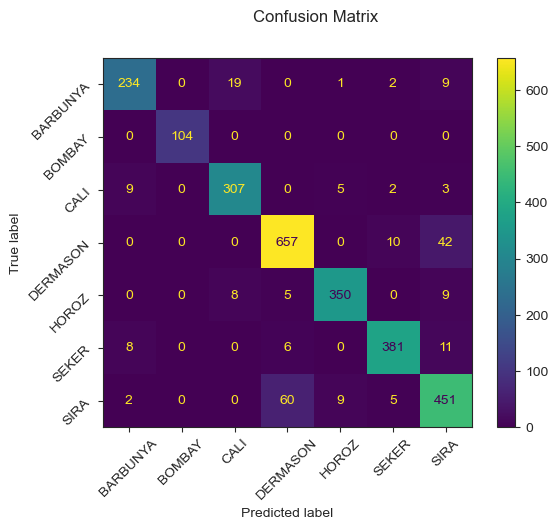

In [110]:
labels = np.unique(y)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_fin_ga, display_labels=labels)
disp.figure_.suptitle("Confusion Matrix")
plt.xticks(rotation=45)  
plt.yticks(rotation=45)  
plt.show()
#plt.savefig("Confusion_Matrix.png")

-----------------------------

## Discuss the hard points from EDA, how did you solve it

The dataset contained duplicates, which were handled by dropping using the 'drop' function during the preprocessing stage.

Some of the features are highly skewed and exhibit outliers, with some demonstrating notably higher occurrences than others. Skewness is often caused by the presence of outliers or extreme values in the dataset. Therefore, transforming the data to address skewness can reduce the influence of outliers. For addressing skewness, the PowerTransformer function from the sklearn.preprocessing module is used. It applies a power transform feature-wise to make the data more Gaussian-like.

The distribution of the target variable was not balanced. Fixing an imbalanced dataset typically involves either oversampling the minority class, undersampling the majority class, or using algorithmic approaches. I decided to go with the algorithmic approach, using algorithms that are robust to class imbalance, such as decision trees, random forests, gradient boosting machines, and support vector machines.

The correlation matrix allowed us to observe high correlation between multiple features. I used the SelectKBest feature selection technique. (SelectKBest directly selects the top k most relevant features to the target variable based on a scoring function.)
(I performed a version of GridSearch where I used both SelectKBest and PCA, and SelectKBest performed slightly better. Due to the long execution time, I decided to omit it.)